In [2]:
!pip3 install xgboost
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import statsmodels.api as sm
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split

In [3]:
df= pd.read_csv('PS_20174392719_1491204439457_log.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [4]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14247 entries, 0 to 14246
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            14247 non-null  int64  
 1   type            14247 non-null  object 
 2   amount          14247 non-null  float64
 3   nameOrig        14247 non-null  object 
 4   oldbalanceOrg   14246 non-null  float64
 5   newbalanceOrig  14246 non-null  float64
 6   nameDest        14246 non-null  object 
 7   oldbalanceDest  14246 non-null  float64
 8   newbalanceDest  14246 non-null  float64
 9   isFraud         14246 non-null  float64
 10  isFlaggedFraud  14246 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 1.2+ MB


In [6]:
df['step'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8])

In [7]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     1
newbalanceOrig    1
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

In [8]:
df.shape

(14247, 11)

In [9]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [10]:
type=df['type'].value_counts()

In [11]:
transaction=type.index

In [12]:
quantity=type.values

In [13]:
import plotly.express as px

In [14]:
px.pie(df,values=quantity,names=transaction,hole=0.4,title="Distribution of transaction type")

<Axes: title={'center': 'missing data visualization in the dataset'}>

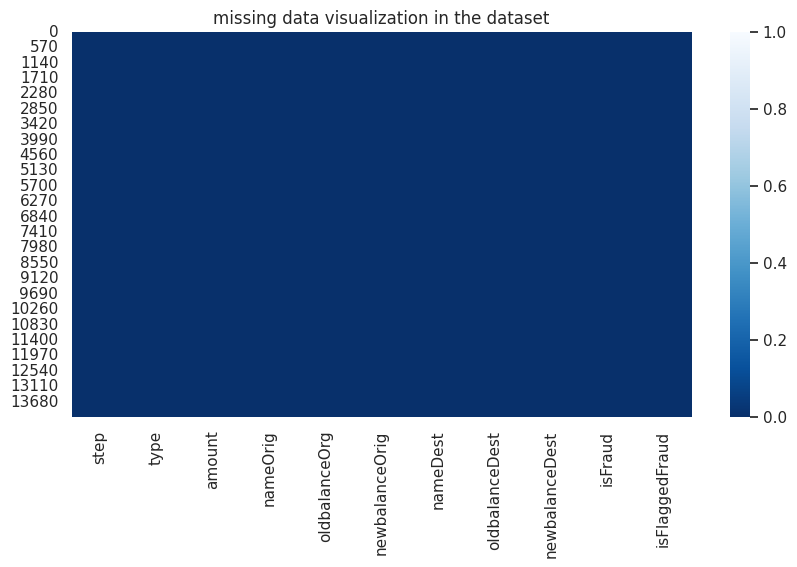

In [15]:
plt.figure(figsize = (10,5))
plt.title ("missing data visualization in the dataset")
sns.heatmap(df.isnull(), cbar =True, cmap= "Blues_r")

<ipython-input-16-e24284e1b2f0>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

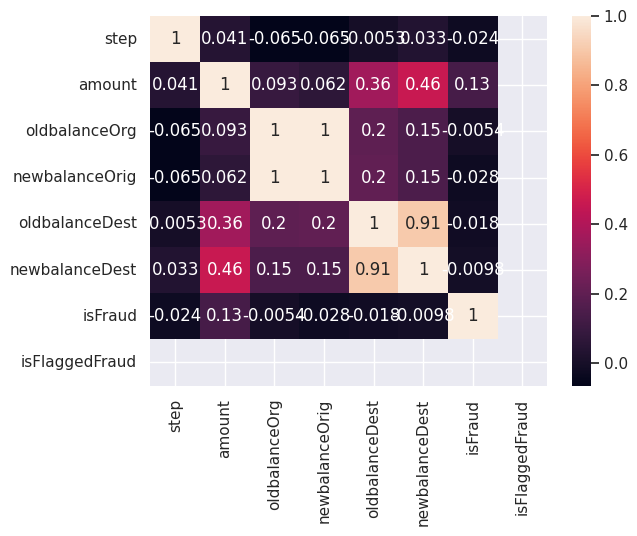

In [16]:
corel= df.corr()
sns.heatmap(corel, annot =True)

In [17]:
df=df.dropna()
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
14241,8,PAYMENT,35108.12,C1925841262,0.0,0.00,M828869162,0.0,0.0,0.0,0.0
14242,8,PAYMENT,20924.47,C1540995845,18265.0,0.00,M1309313968,0.0,0.0,0.0,0.0
14243,8,CASH_OUT,75244.54,C1827218030,38369.0,0.00,C1292445663,167.0,0.0,0.0,0.0
14244,8,PAYMENT,3074.36,C1632817923,10242.0,7167.64,M2001030591,0.0,0.0,0.0,0.0


In [18]:
df.replace(to_replace=['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'])

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,PAYMENT,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,PAYMENT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
14241,8,PAYMENT,35108.12,C1925841262,0.0,0.00,M828869162,0.0,0.0,0.0,0.0
14242,8,PAYMENT,20924.47,C1540995845,18265.0,0.00,M1309313968,0.0,0.0,0.0,0.0
14243,8,PAYMENT,75244.54,C1827218030,38369.0,0.00,C1292445663,167.0,0.0,0.0,0.0
14244,8,PAYMENT,3074.36,C1632817923,10242.0,7167.64,M2001030591,0.0,0.0,0.0,0.0


In [19]:
type

PAYMENT     7869
CASH_IN     2472
CASH_OUT    2055
TRANSFER    1438
DEBIT        413
Name: type, dtype: int64

In [20]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
14241,8,PAYMENT,35108.12,C1925841262,0.0,0.00,M828869162,0.0,0.0,0.0,0.0
14242,8,PAYMENT,20924.47,C1540995845,18265.0,0.00,M1309313968,0.0,0.0,0.0,0.0
14243,8,CASH_OUT,75244.54,C1827218030,38369.0,0.00,C1292445663,167.0,0.0,0.0,0.0
14244,8,PAYMENT,3074.36,C1632817923,10242.0,7167.64,M2001030591,0.0,0.0,0.0,0.0


In [21]:
df['isFraud']=df['isFraud'].map({0:'No fraud',1:'fraud'})
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,No fraud,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,No fraud,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,fraud,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,fraud,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,No fraud,0.0
...,...,...,...,...,...,...,...,...,...,...,...
14241,8,PAYMENT,35108.12,C1925841262,0.0,0.00,M828869162,0.0,0.0,No fraud,0.0
14242,8,PAYMENT,20924.47,C1540995845,18265.0,0.00,M1309313968,0.0,0.0,No fraud,0.0
14243,8,CASH_OUT,75244.54,C1827218030,38369.0,0.00,C1292445663,167.0,0.0,No fraud,0.0
14244,8,PAYMENT,3074.36,C1632817923,10242.0,7167.64,M2001030591,0.0,0.0,No fraud,0.0


In [22]:
x=df[['type','amount','oldbalanceOrg','newbalanceOrig']]
y=df.iloc[:,-2]
x

,type,amount,oldbalanceOrg,newbalanceOrig
0,PAYMENT,9839.64,170136.0,160296.36
1,PAYMENT,1864.28,21249.0,19384.72
2,TRANSFER,181.00,181.0,0.00
3,CASH_OUT,181.00,181.0,0.00
4,PAYMENT,11668.14,41554.0,29885.86
...,...,...,...,...
14241,PAYMENT,35108.12,0.0,0.00
14242,PAYMENT,20924.47,18265.0,0.00
14243,CASH_OUT,75244.54,38369.0,0.00
14244,PAYMENT,3074.36,10242.0,7167.64


In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
x = x[x.columns[:]].apply(le.fit_transform)

In [24]:
x

,type,amount,oldbalanceOrg,newbalanceOrig
0,3,6215,6781,4771
1,3,1467,3293,2108
2,4,132,129,0
3,1,132,129,0
4,3,6791,4693,2746
...,...,...,...,...
14241,3,8908,0,0
14242,3,8198,2852,0
14243,1,9798,4514,0
14244,3,2460,1773,908


import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(x, *['type'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(x, *['amount'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(x, *['oldbalanceOrg'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(x, *['newbalanceOrig'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(x, *['type', 'amount'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(x, *['amount', 'oldbalanceOrg'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(x, *['oldbalanceOrg', 'newbalanceOrig'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(x, *['type'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(x, *['amount'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(x, *['oldbalanceOrg'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(x, *['newbalanceOrig'], **{})
chart

In [25]:
y

0        No fraud
1        No fraud
2           fraud
3           fraud
4        No fraud
           ...   
14241    No fraud
14242    No fraud
14243    No fraud
14244    No fraud
14245    No fraud
Name: isFraud, Length: 14246, dtype: object

In [26]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

In [27]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
linear.fit(x,y)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)
df=LinearRegression().fit(xtrain,ytrain)
model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [28]:
model.score(xtest,ytest)


0.9947368421052631

In [29]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
linear.fit(x,y)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)
df=LinearRegression().fit(xtrain,ytrain)
model.fit(xtrain,ytrain)

RandomForestClassifier()

In [30]:
model.score(xtest,ytest)

0.9954385964912281

In [31]:
model.predict([[4, 9000.60, 9000.60, 0.0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



array([1])

In [46]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [49]:
DC = DecisionTreeClassifier(random_state=42)
RF = RandomForestClassifier(random_state=42)

In [50]:
models = [DC,RF]

In [41]:
def plot_confusion_matrix(y_test,prediction):
    cm_ = confusion_matrix(y_test,prediction)
    plt.figure(figsize = (6,4))
    sns.heatmap(cm_, cmap ='coolwarm', linecolor = 'white', linewidths = 1, annot = True, fmt = 'd')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [51]:
from sklearn.metrics import confusion_matrix

In [52]:
def trainer(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    print('\nFor {}\n'.format(model.__class__.__name__,accuracy_score(prediction,y_test)))
    print(classification_report(y_test, prediction))
    plot_confusion_matrix(y_test,prediction)


For DecisionTreeClassifier

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2834
           1       0.69      0.56      0.62        16

    accuracy                           1.00      2850
   macro avg       0.84      0.78      0.81      2850
weighted avg       1.00      1.00      1.00      2850



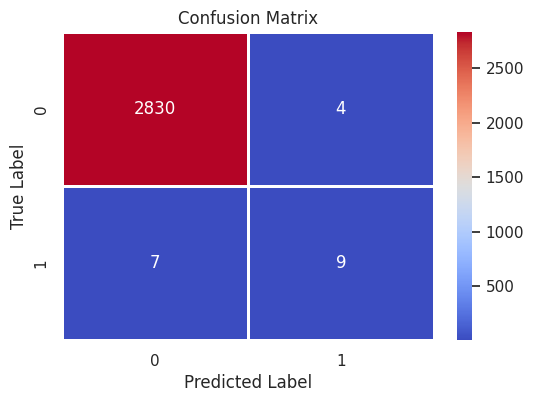


For RandomForestClassifier

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2834
           1       0.91      0.62      0.74        16

    accuracy                           1.00      2850
   macro avg       0.95      0.81      0.87      2850
weighted avg       1.00      1.00      1.00      2850



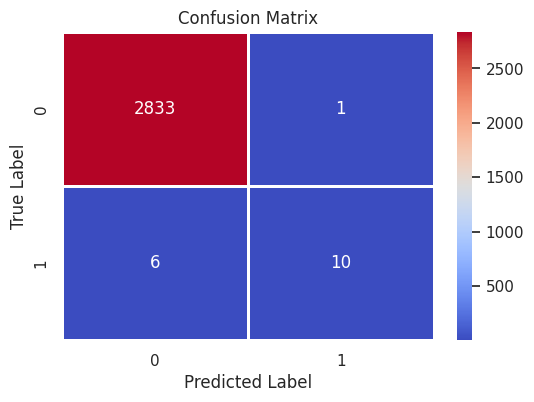

In [53]:
for model in models:
    trainer(model,x_train,y_train,x_test,y_test)

2,9800,170136,160296-not fraud
4, 9000.60, 9000.60, 0.0-fraud
